In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Test API

In [2]:
# user inputs
ticker = "FPH.NZ"
PERIOD = "20y"

In [5]:
stock = yf.Ticker(ticker)
print(stock.info)
print(stock.info.get("currency"))

data = stock.history(period=PERIOD, actions=True)
data['Dividends'] = data['Dividends'].fillna(0)
print(data.shape)

{'address1': '15 Maurice Paykel Place', 'address2': 'East Tamaki', 'city': 'Auckland', 'zip': '2013', 'country': 'New Zealand', 'phone': '64 9 574 0100', 'fax': '64 9 574 0158', 'website': 'https://www.fphcare.com', 'industry': 'Medical Instruments & Supplies', 'industryKey': 'medical-instruments-supplies', 'industryDisp': 'Medical Instruments & Supplies', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': 'Fisher & Paykel Healthcare Corporation Limited, together with its subsidiaries, designs, manufactures, markets, and sells medical device products and systems in North America, Europe, the Asia Pacific, and internationally. It provides its products for use in acute and chronic respiratory care, and surgery, as well as the treatment of obstructive sleep apnea (OSA) in the home and hospital. The company also offers adult respiratory products, including optiflow nasal high flow therapy, invasive ventilation, and noninvasive ventilation.

In [6]:
data.head(-20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2005-02-14 00:00:00+13:00,2.125431,2.131891,2.106050,2.106050,359200,0.0,0.0
2005-02-15 00:00:00+13:00,2.106050,2.112511,2.047908,2.060828,412200,0.0,0.0
2005-02-16 00:00:00+13:00,2.060828,2.099590,2.060828,2.060828,366100,0.0,0.0
2005-02-17 00:00:00+13:00,2.060828,2.067289,2.060828,2.067289,222400,0.0,0.0
2005-02-18 00:00:00+13:00,2.067289,2.060829,2.047908,2.054368,250800,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-10 00:00:00+13:00,37.400002,38.119999,37.400002,37.910000,196337,0.0,0.0
2025-01-13 00:00:00+13:00,37.500000,37.689999,37.349998,37.549999,211703,0.0,0.0
2025-01-14 00:00:00+13:00,37.500000,38.290001,37.299999,38.290001,368477,0.0,0.0


In [7]:
dividend_events = data[data['Dividends'] > 0]
dividend_events

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-06-21 00:00:00+12:00,2.287599,2.300784,2.254636,2.287599,1892179,0.070000,0.0
2007-12-06 00:00:00+13:00,2.145246,2.172062,2.105023,2.131838,851100,0.054000,0.0
2008-06-19 00:00:00+12:00,1.555095,1.555095,1.492892,1.520538,1086066,0.070000,0.0
2008-12-04 00:00:00+13:00,2.145268,2.166369,2.110100,2.110100,488653,0.054000,0.0
2009-06-22 00:00:00+12:00,2.040113,2.090575,2.032904,2.076158,725788,0.070000,0.0
2009-12-10 00:00:00+13:00,2.417438,2.468717,2.417438,2.468717,229711,0.054000,0.0
2010-06-28 00:00:00+12:00,2.337692,2.337692,2.300229,2.315214,481070,0.070000,0.0
2010-12-01 00:00:00+13:00,2.202376,2.247475,2.194859,2.247475,1674891,0.009529,0.0
2011-06-22 00:00:00+12:00,2.263234,2.263234,2.201649,2.201649,391689,0.070000,0.0


# All ASX200 stocks

In [12]:
def cal_div_harvest(ticker_list: list, period: str):
    import yfinance as yf
    import pandas as pd
    import time

    # Dictionaries to hold the yearly profit and percentage returns for each ticker
    results_yearly = {}
    results_yearly_pct = {}

    # Dictionary to hold the individual trade details for each ticker
    results_trades = {}

    # Loop over each ticker
    for ticker in ticker_list:
        print(f"Processing {ticker}...")
        try:
            stock = yf.Ticker(ticker)
            # Download historical data including dividends
            hist_data = stock.history(period=period, actions=True)
            
            # Skip if no data is returned
            if hist_data.empty:
                print(f"  No historical data for {ticker}.")
                continue
            
            # Fill missing dividend values with 0
            hist_data['Dividends'] = hist_data['Dividends'].fillna(0)
            
            # Identify dividend events (rows where dividends were paid)
            dividend_events = hist_data[hist_data['Dividends'] > 0]
            if dividend_events.empty:
                print(f"  No dividend events for {ticker}.")
                continue
            
            # Dictionaries to accumulate yearly profit and percentage returns
            yearly_profits = {}
            yearly_pct = {}
            
            # List to accumulate individual trade details for this ticker
            trades_details = []
            
            # Flag to mark if a negative buy price is encountered for this ticker (data issue).
            bad_stock = False
            
            # Loop through each dividend event
            for ex_div_date in dividend_events.index:
                try:
                    idx = hist_data.index.get_loc(ex_div_date)
                except Exception as e:
                    print(f"  Could not locate index for {ex_div_date} in {ticker}: {e}")
                    continue

                # Need to have a prior day (to buy) and a following day (to sell)
                if idx == 0 or idx >= len(hist_data) - 1:
                    continue

                # Simulate the trade:
                # Buy the day before the ex-dividend date
                buy_date = hist_data.index[idx - 1]
                # Use average of High and Low for the buy price
                buy_price = (hist_data.loc[buy_date, 'High'] + hist_data.loc[buy_date, 'Low']) / 2.0
                
                # Check for negative buy price. If found, skip this ticker.
                if buy_price < 0:
                    print(f"  Negative buy price encountered for {ticker} on {buy_date} ({buy_price}). Removing ticker from results.")
                    bad_stock = True
                    break

                # Sell the day after the ex-dividend date
                sell_date = hist_data.index[idx + 1]
                # Use average of High and Low for the sell price
                sell_price = (hist_data.loc[sell_date, 'High'] + hist_data.loc[sell_date, 'Low']) / 2.0
                # Dividend received on the ex-dividend date
                dividend = hist_data.loc[ex_div_date, 'Dividends']

                # Calculate profit and percentage return
                profit = (sell_price + dividend) - buy_price
                pct_return = profit / buy_price * 100

                # Use the ex-dividend date's year for grouping
                year = ex_div_date.year
                if year not in yearly_profits:
                    yearly_profits[year] = 0.0
                yearly_profits[year] += profit

                if year not in yearly_pct:
                    yearly_pct[year] = 0.0
                yearly_pct[year] += pct_return

                # Save the individual trade details for later investigation
                trades_details.append({
                    "ex_div_date": ex_div_date,
                    "buy_date": buy_date,
                    "sell_date": sell_date,
                    "buy_price": buy_price,
                    "sell_price": sell_price,
                    "dividend": dividend,
                    "profit": profit,
                    "pct_return": pct_return,
                    "year": year
                })
            
            # If a negative buy price was encountered, skip this ticker entirely.
            if bad_stock:
                continue
            
            # Store the aggregate results if any trades were found
            if yearly_profits:
                results_yearly[ticker] = yearly_profits
            else:
                print(f"  No valid trades for {ticker}.")

            if yearly_pct:
                results_yearly_pct[ticker] = yearly_pct

            # Store the individual trade details for this ticker
            results_trades[ticker] = trades_details
                
        except Exception as e:
            print(f"  Error processing {ticker}: {e}")
        
        # Pause to be kind to Yahoo Finance's servers.
        time.sleep(1)

    results_pct = pd.DataFrame.from_dict(results_yearly_pct, orient='index')
    results_pct = results_pct.fillna(0)
    results_pct = results_pct[sorted(results_pct.columns, key=int)]

    results_profit = pd.DataFrame.from_dict(results_yearly, orient='index')
    results_profit = results_profit.fillna(0)
    results_profit = results_profit[sorted(results_profit.columns, key=int)]
    
    return results_profit, results_pct, results_trades


In [13]:
# List of ASX200 tickers
asx_tickers = [
    "BHP.AX", "CBA.AX", "WBC.AX", "ANZ.AX", "NAB.AX", "TLS.AX", "WES.AX"
]

results_profit_ax, results_pct_ax, results_trades_ax = cal_div_harvest(asx_tickers, period="20y")

# Convert the dictionary of dictionaries into a DataFrame.
# The outer keys (tickers) will be the rows and the inner keys (years) become columns.


Processing BHP.AX...
Processing CBA.AX...
Processing WBC.AX...
Processing ANZ.AX...
Processing NAB.AX...
Processing TLS.AX...
Processing WES.AX...


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

def plot_heatmap(df: pd.DataFrame, figsize: tuple = (12, 8),
                 colour_min_max: tuple = (-10, 10),
                 cbar_fixed_height_in: float = 6.0):
    """
    Plots a heatmap with a colorbar of fixed physical height.

    Parameters:
      df: DataFrame to plot.
      figsize: Figure size in inches.
      colour_min_max: Tuple with (min, max) color limits.
      cbar_fixed_height_in: colourbar legend height in inches.
    """
    # Create the figure and main axes.
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    
    # Calculate the normalized colourbar height.
    # The figure's height in inches is figsize[1].
    normalized_cbar_height = cbar_fixed_height_in / figsize[1]
    
    # Position the colorbar (relative positioning):
    cbar_left = 0.92
    cbar_top = 0.9
    cbar_ax = fig.add_axes([cbar_left, cbar_top - normalized_cbar_height, 0.02, normalized_cbar_height])
    
    # Plot heatmap
    hm = sns.heatmap(df,
                     annot=True,
                     fmt=".2f",
                     cmap='RdYlGn',
                     center=0,
                     vmin=colour_min_max[0],
                     vmax=colour_min_max[1],
                     linewidths=0.5,
                     linecolor='gray',
                     ax=ax,
                     cbar_ax=cbar_ax)
    
    # Formatting
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_title("Dividend Harvesting % Returns", fontsize=16)
    ax.set_ylabel("Stonk", fontsize=14)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    # Add % to colourbar
    cbar_ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x:.1f}%'))
    plt.show()


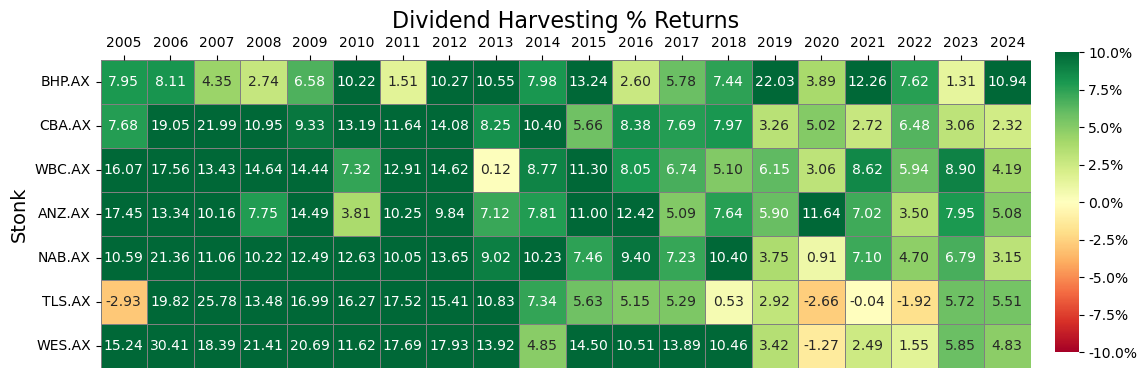

In [28]:
plot_heatmap(df=results_pct_ax, figsize=(12, 4), cbar_fixed_height_in=3)

In [29]:
# Investigate the trades for a certain ticker
investigate_ticker = "BHP.AX"
if investigate_ticker in results_trades_ax:
    trades_df = pd.DataFrame(results_trades_ax[investigate_ticker])
    print(f"\nDetailed trades for {investigate_ticker}:")
    print(trades_df)
else:
    print(f"No trade details available for {investigate_ticker}.")


Detailed trades for BHP.AX:
                 ex_div_date                  buy_date  \
0  2005-02-28 00:00:00+11:00 2005-02-25 00:00:00+11:00   
1  2005-09-05 00:00:00+10:00 2005-09-02 00:00:00+10:00   
2  2006-02-27 00:00:00+11:00 2006-02-24 00:00:00+11:00   
3  2006-09-04 00:00:00+10:00 2006-09-01 00:00:00+10:00   
4  2007-02-26 00:00:00+11:00 2007-02-23 00:00:00+11:00   
5  2007-09-10 00:00:00+10:00 2007-09-07 00:00:00+10:00   
6  2008-02-25 00:00:00+11:00 2008-02-22 00:00:00+11:00   
7  2008-09-01 00:00:00+10:00 2008-08-29 00:00:00+10:00   
8  2009-02-23 00:00:00+11:00 2009-02-20 00:00:00+11:00   
9  2009-08-31 00:00:00+10:00 2009-08-28 00:00:00+10:00   
10 2010-03-01 00:00:00+11:00 2010-02-26 00:00:00+11:00   
11 2010-09-06 00:00:00+10:00 2010-09-03 00:00:00+10:00   
12 2011-03-07 00:00:00+11:00 2011-03-04 00:00:00+11:00   
13 2011-09-05 00:00:00+10:00 2011-09-02 00:00:00+10:00   
14 2012-02-27 00:00:00+11:00 2012-02-24 00:00:00+11:00   
15 2012-09-03 00:00:00+10:00 2012-08-31 00:

In [116]:
# Open the file in read mode
with open('data/nzx50.txt', 'r') as file:
    # Read each line, remove extra whitespace/newlines, and filter out any empty lines
    nzx50_tickers = [line.strip() for line in file if line.strip()]

print(nzx50_tickers)


results_profit_nzx, results_pct_nzx, results_trades_nzx = cal_div_harvest(nzx50_tickers, period="20y")

['FPH.NZ', 'MEL.NZ', 'AIA.NZ', 'IFT.NZ', 'MCY.NZ', 'EBO.NZ', 'CEN.NZ', 'MFT.NZ', 'SPK.NZ', 'ATM.NZ', 'POT.NZ', 'VCT.NZ', 'CNU.NZ', 'GMT.NZ', 'FBU.NZ', 'SUM.NZ', 'RYM.NZ', 'GNE.NZ', 'AIR.NZ', 'PCT.NZ', 'FRW.NZ', 'MNW.NZ', 'KPG.NZ', 'GTK.NZ', 'VHP.NZ', 'WBC.NZ', 'PFI.NZ', 'SKC.NZ', 'HGH.NZ', 'VSL.NZ', 'SKL.NZ', 'ANZ.NZ', 'ARG.NZ', 'VGL.NZ', 'CHI.NZ', 'SPG.NZ', 'SCL.NZ', 'OCA.NZ', 'FSF.NZ', 'TWR.NZ', 'HLG.NZ', 'NZX.NZ', 'TRA.NZ', 'SAN.NZ', 'SKO.NZ', 'IPL.NZ', 'THL.NZ', 'SKT.NZ', 'WHS.NZ', 'KMD.NZ']
Processing FPH.NZ...
Processing MEL.NZ...
Processing AIA.NZ...
Processing IFT.NZ...
Processing MCY.NZ...
Processing EBO.NZ...
Processing CEN.NZ...
Processing MFT.NZ...
Processing SPK.NZ...
Processing ATM.NZ...
  No dividend events for ATM.NZ.
Processing POT.NZ...
Processing VCT.NZ...
Processing CNU.NZ...
Processing GMT.NZ...
Processing FBU.NZ...
Processing SUM.NZ...
Processing RYM.NZ...
Processing GNE.NZ...
Processing AIR.NZ...
Processing PCT.NZ...
Processing FRW.NZ...
Processing MNW.NZ...
Proc

/tmp/ipykernel_4547/3975602865.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


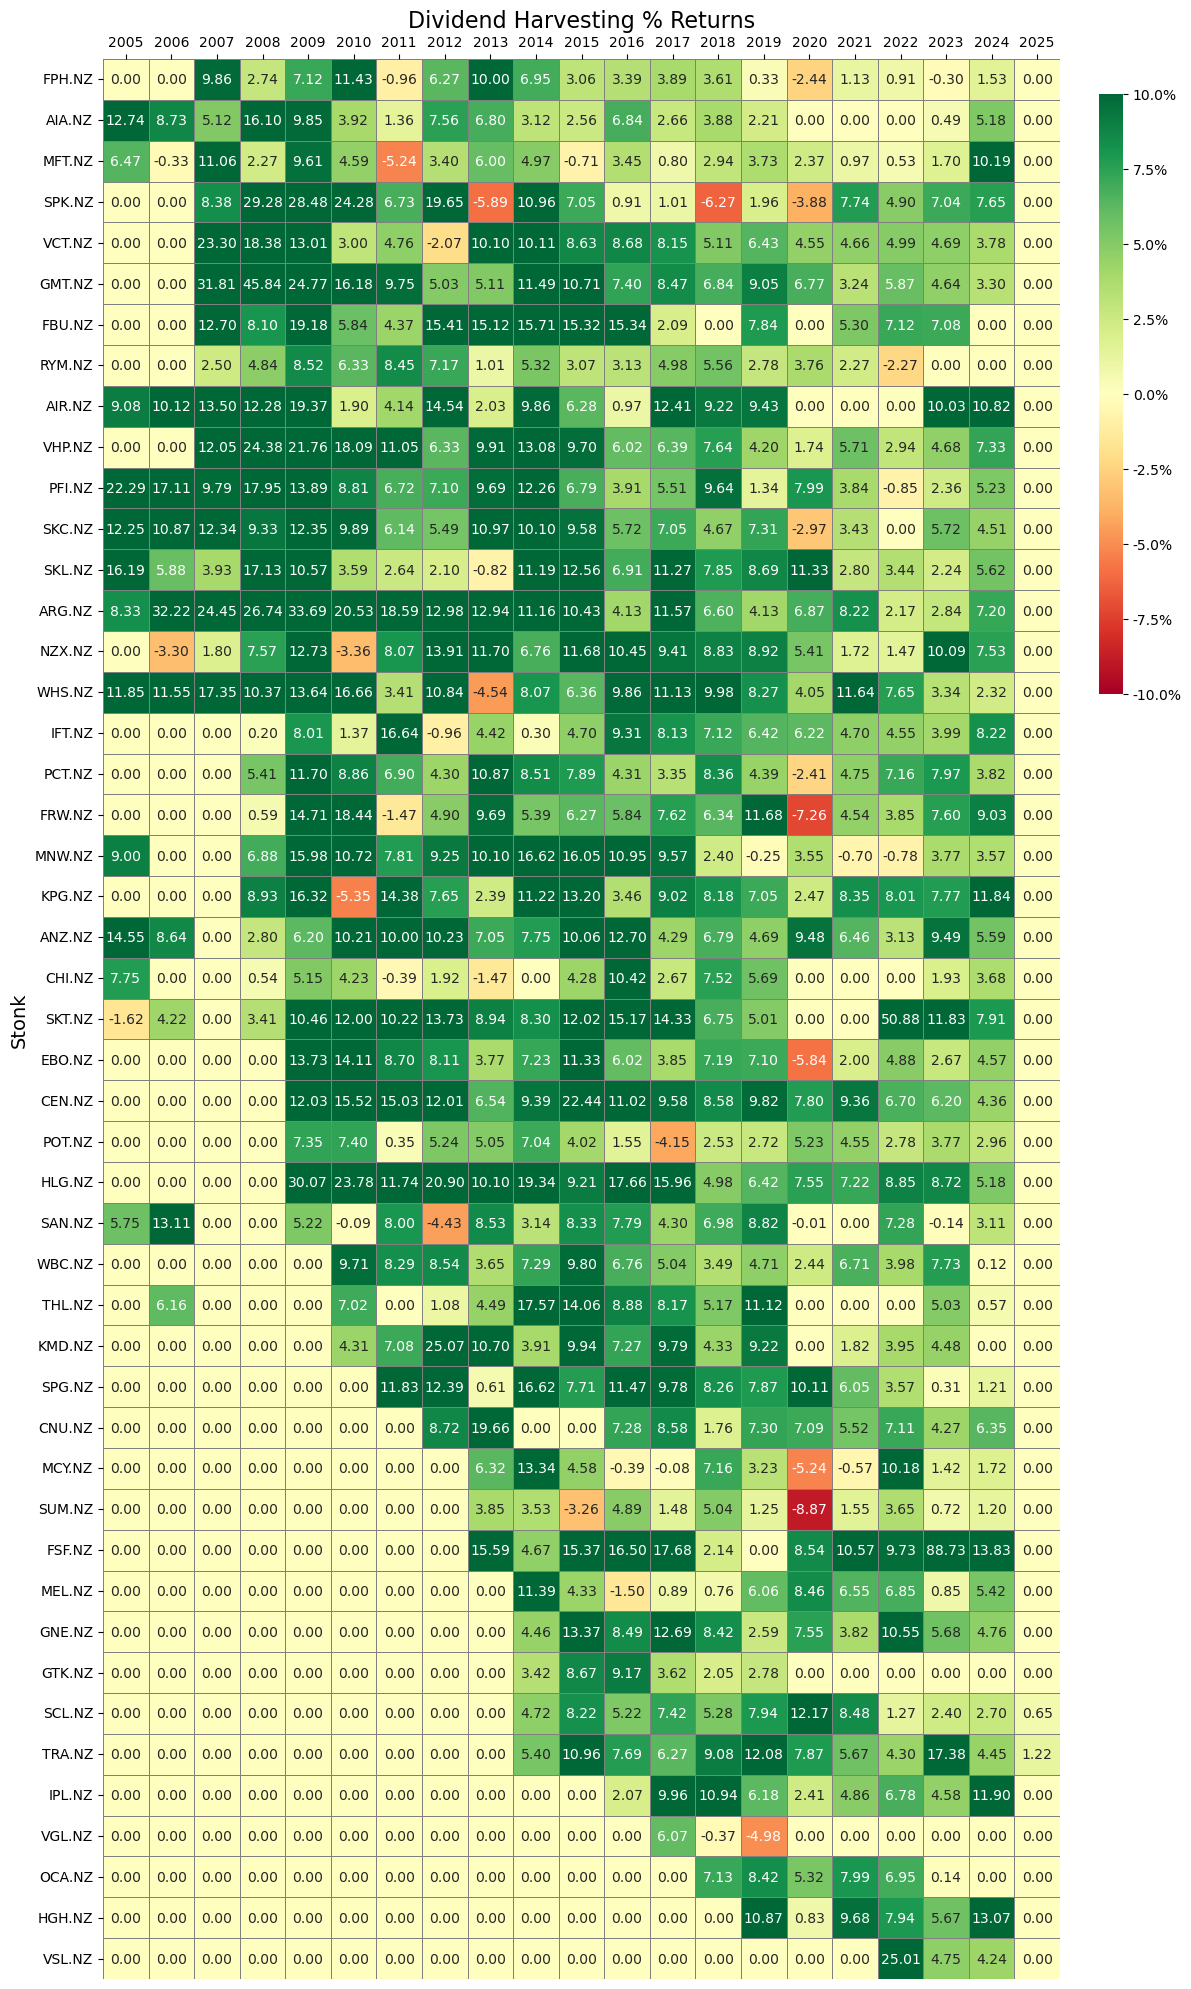

In [161]:
plot_heatmap(df=results_pct, figsize=(12, 20))

In [138]:
results_pct

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
FPH.NZ,0.000000,0.000000,9.861281,2.737847,7.122869,11.426522,-0.961079,6.269780,10.001547,6.946937,...,3.387544,3.885525,3.610937,0.333055,-2.437158,1.132719,0.912524,-0.299110,1.528452,0.000000
AIA.NZ,12.737572,8.728905,5.123317,16.099115,9.845746,3.924174,1.357060,7.556847,6.801555,3.115572,...,6.839170,2.659090,3.877817,2.212091,0.000000,0.000000,0.000000,0.492712,5.181985,0.000000
MFT.NZ,6.470813,-0.329498,11.059488,2.271822,9.610176,4.585397,-5.235814,3.400166,5.996575,4.965349,...,3.449516,0.795116,2.935087,3.727905,2.374602,0.973116,0.533760,1.698363,10.190784,0.000000
SPK.NZ,0.000000,0.000000,8.377905,29.275738,28.484353,24.283953,6.729016,19.650249,-5.891340,10.963504,...,0.905264,1.006168,-6.265774,1.961743,-3.875715,7.740213,4.904374,7.043982,7.647586,0.000000
VCT.NZ,0.000000,0.000000,23.295916,18.380020,13.006152,2.996174,4.759092,-2.069941,10.098882,10.108500,...,8.676083,8.147033,5.113074,6.426669,4.547583,4.662843,4.985022,4.691931,3.781369,0.000000
GMT.NZ,0.000000,0.000000,31.810538,45.841499,24.765643,16.183004,9.750713,5.033658,5.108560,11.485142,...,7.402527,8.474986,6.843628,9.051397,6.773059,3.239293,5.873550,4.643232,3.298158,0.000000
FBU.NZ,0.000000,0.000000,12.699934,8.097453,19.177429,5.843385,4.372120,15.412450,15.120161,15.707951,...,15.340371,2.088769,0.000000,7.838971,0.000000,5.304873,7.123529,7.083594,0.000000,0.000000
RYM.NZ,0.000000,0.000000,2.498895,4.839520,8.519630,6.325447,8.453392,7.165178,1.005052,5.319291,...,3.129566,4.983700,5.561309,2.781377,3.763513,2.274415,-2.266791,0.000000,0.000000,0.000000
AIR.NZ,9.080749,10.122319,13.502858,12.283311,19.369626,1.901837,4.136879,14.537706,2.028977,9.860738,...,0.974775,12.414275,9.222106,9.425569,0.000000,0.000000,0.000000,10.031585,10.820656,0.000000
VHP.NZ,0.000000,0.000000,12.052293,24.378804,21.763296,18.090218,11.047558,6.327477,9.913723,13.084670,...,6.017377,6.392747,7.635595,4.202957,1.741468,5.713159,2.941301,4.675358,7.327282,0.000000


In [139]:
results_pct.to_csv("nzx50results.csv", index=True)

In [ ]:
# List of ASX200 tickers
asx = pd.read_csv('data/asx200.csv')
asx200_tickers = asx['ticker'].tolist()

results_profit_ax, results_pct_ax, results_trades_ax = cal_div_harvest(asx200_tickers, period="20y")


Processing A2M.AX...
  No dividend events for A2M.AX.
Processing AAA.AX...
Processing ABC.AX...


$ABC.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for ABC.AX.
Processing ABP.AX...


$ABP.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for ABP.AX.
Processing AFI.AX...
Processing AGL.AX...
Processing AIA.AX...
Processing ALD.AX...
Processing ALL.AX...
Processing ALQ.AX...
Processing ALU.AX...


$ALU.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for ALU.AX.
Processing ALX.AX...
Processing AMC.AX...
Processing AMP.AX...
Processing ANN.AX...
Processing ANZ.AX...
Processing APA.AX...
Processing APE.AX...
Processing APT.AX...


$APT.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for APT.AX.
Processing APX.AX...
Processing ARB.AX...
Processing ARG.AX...
Processing AST.AX...


$AST.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for AST.AX.
Processing ASX.AX...
Processing AWC.AX...


$AWC.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for AWC.AX.
Processing AZJ.AX...
Processing BAP.AX...
Processing BEN.AX...
Processing BGA.AX...
Processing BHP.AX...
Processing BIN.AX...


$BIN.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for BIN.AX.
Processing BKW.AX...
Processing BLD.AX...


$BLD.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for BLD.AX.
Processing BOQ.AX...
Processing BPT.AX...
Processing BRG.AX...
Processing BSL.AX...
Processing BWP.AX...
Processing BXB.AX...
Processing CAR.AX...
Processing CBA.AX...
Processing CCL.AX...
  No dividend events for CCL.AX.
Processing CCP.AX...
Processing CDA.AX...
Processing CGF.AX...
Processing CHC.AX...
Processing CHN.AX...
  No dividend events for CHN.AX.
Processing CIA.AX...
Processing CIM.AX...


$CIM.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for CIM.AX.
Processing CLW.AX...
Processing CMW.AX...
Processing CNU.AX...
Processing COH.AX...
Processing COL.AX...
Processing CPU.AX...
Processing CQR.AX...
Processing CSL.AX...
Processing CSR.AX...


$CSR.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for CSR.AX.
Processing CTD.AX...
Processing CWN.AX...


$CWN.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for CWN.AX.
Processing CWY.AX...
Processing DEG.AX...
  No dividend events for DEG.AX.
Processing DHG.AX...
Processing DMP.AX...
Processing DOW.AX...
Processing DRR.AX...
Processing DXS.AX...
Processing EBO.AX...
Processing ELD.AX...
Processing EML.AX...
  No dividend events for EML.AX.
Processing EVN.AX...
Processing EVT.AX...
Processing FBU.AX...
Processing FLT.AX...
Processing FMG.AX...
Processing FPH.AX...
Processing GMG.AX...
Processing GNE.AX...
Processing GOZ.AX...
Processing GPT.AX...
Processing GXY.AX...


$GXY.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for GXY.AX.
Processing HLS.AX...
Processing HVN.AX...
Processing IAG.AX...
Processing IEL.AX...
Processing IFL.AX...
Processing IFT.AX...
Processing IGO.AX...
Processing ILU.AX...
Processing IOO.AX...
Processing IOZ.AX...
Processing IPL.AX...
Processing IRE.AX...
Processing IVV.AX...
Processing JBH.AX...
Processing JHX.AX...
Processing LFG.AX...
Processing LFS.AX...
Processing LLC.AX...
Processing LNK.AX...


$LNK.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for LNK.AX.
Processing LYC.AX...
  No dividend events for LYC.AX.
Processing MCY.AX...
Processing MEZ.AX...
  Negative buy price encountered for MEZ.AX on 2014-03-26 00:00:00+11:00 (-3.1577785015106206). Removing ticker from results.
Processing MFG.AX...
Processing MGF.AX...


$MGF.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for MGF.AX.
Processing MGOC.AX...
Processing MGR.AX...
Processing MIN.AX...
Processing MLT.AX...


$MLT.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for MLT.AX.
Processing MP1.AX...
  No dividend events for MP1.AX.
Processing MPL.AX...
Processing MQG.AX...
Processing MTS.AX...
Processing NAB.AX...
Processing NCM.AX...


$NCM.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for NCM.AX.
Processing NEC.AX...
Processing NHF.AX...
Processing NIC.AX...
Processing NSR.AX...
Processing NST.AX...
Processing NUF.AX...
Processing NWL.AX...
Processing NXT.AX...
  No dividend events for NXT.AX.
Processing ORA.AX...
Processing ORE.AX...


$ORE.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for ORE.AX.
Processing ORG.AX...
Processing ORI.AX...
Processing OSH.AX...


$OSH.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for OSH.AX.
Processing OZL.AX...


$OZL.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for OZL.AX.
Processing PBH.AX...
Processing PDL.AX...


$PDL.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for PDL.AX.
Processing PLS.AX...
Processing PME.AX...
Processing PMGOLD.AX...
  No dividend events for PMGOLD.AX.
Processing PMV.AX...
Processing PNI.AX...
Processing PNV.AX...
  No dividend events for PNV.AX.
Processing PPT.AX...
Processing PTM.AX...
Processing QAN.AX...
Processing QBE.AX...
Processing QUB.AX...
Processing REA.AX...
Processing REH.AX...
Processing RHC.AX...
Processing RIO.AX...
Processing RMD.AX...
Processing RRL.AX...
Processing RWC.AX...
Processing S32.AX...
Processing SCG.AX...
Processing SCP.AX...
  No dividend events for SCP.AX.
Processing SDF.AX...
Processing SEK.AX...
Processing SGM.AX...
Processing SGP.AX...
Processing SGR.AX...
Processing SHL.AX...
Processing SKC.AX...
Processing SKI.AX...


$SKI.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for SKI.AX.
Processing SLK.AX...


$SLK.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for SLK.AX.
Processing SNZ.AX...
Processing SOL.AX...
Processing SPK.AX...
Processing STO.AX...
Processing STW.AX...
Processing SUL.AX...
Processing SUN.AX...
Processing SVW.AX...


$SVW.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for SVW.AX.
Processing SYD.AX...


$SYD.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for SYD.AX.
Processing TAH.AX...
Processing TCL.AX...
Processing TLS.AX...
Processing TLT.AX...


$TLT.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for TLT.AX.
Processing TNE.AX...
Processing TPG.AX...
Processing TWE.AX...
Processing TYR.AX...
  No dividend events for TYR.AX.
Processing VAP.AX...
Processing VAS.AX...
Processing VCX.AX...
Processing VEA.AX...
Processing VEU.AX...
Processing VGS.AX...
Processing VOC.AX...


$VOC.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for VOC.AX.
Processing VTS.AX...
Processing VUK.AX...


$VUK.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for VUK.AX.
Processing WAM.AX...
Processing WBC.AX...
Processing WEB.AX...
Processing WES.AX...
Processing WOR.AX...
Processing WOW.AX...
Processing WPL.AX...


$WPL.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for WPL.AX.
Processing WPR.AX...
Processing WTC.AX...
Processing XRO.AX...
  No dividend events for XRO.AX.
Processing YAL.AX...
Processing Z1P.AX...


$Z1P.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for Z1P.AX.
Processing ZIM.AX...


AttributeError: 'dict' object has no attribute 'to_csv'

In [151]:
results_pct_ax.to_csv("outputs/asx200_pct_results.csv", index=True)
results_profit_ax.to_csv("outputs/asx200_profit_results.csv", index=True)

# Create an empty list to store all trade dictionaries
all_trades = []

# Loop over each ticker and its list of trades in the dictionary
for ticker, trades in results_trades_ax.items():
    for trade in trades:
        # Add a new key-value pair to record which ticker the trade belongs to
        trade['ticker'] = ticker
        all_trades.append(trade)

# Convert the list of trade dictionaries into a DataFrame
df_trades = pd.DataFrame(all_trades)

# Save the DataFrame to a CSV file
df_trades.to_csv('outputs/asx200_trades.csv', index=False)

/tmp/ipykernel_4547/3975602865.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


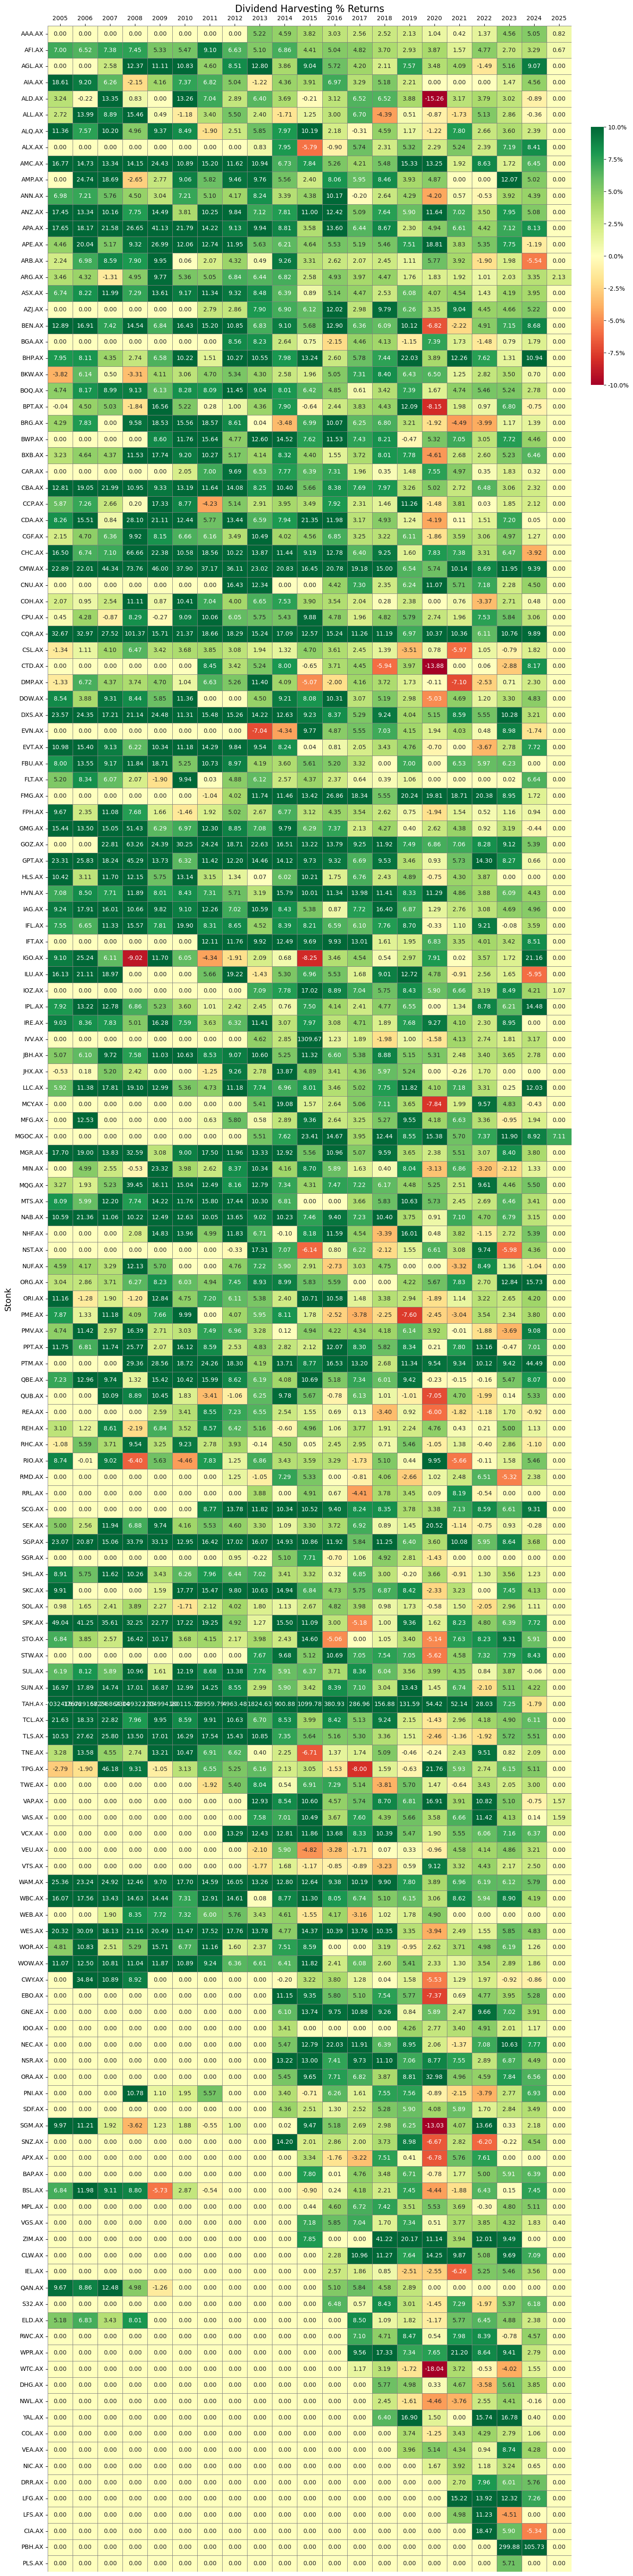

In [162]:
plot_heatmap(df=results_pct_ax, figsize=(15, 60))